# Intraseasonal variability in Sea level 

In [124]:
%load_ext ferretmagic

The ferretmagic extension is already loaded. To reload it, use:
  %reload_ext ferretmagic


<img src="Images/Han_paper_title.png" width="600" height="400">
<img src="Images/Han_30_90_Gan.png" width="400" height="400">  

In [2]:
%%ferret
cance data/all
use/order=XYT "Data/AVISO_NIO_1x1deg.nc"
sh d
sh grid ssh

currently SET data sets:
 1> Data/AVISO_NIO_1x1deg.nc (default)
 name title I J K L
 SSH SLA[G=GRD] 1:61 1:33 ... 1:1376
 
 GRID GRP1
 name axis # pts start end subset
 XAX LONGITUDE 61mr 40E 100E full
 YAX LATITUDE 33 r 5S 27N full
 normal Z
 TIME TIME 1376 r 04-JAN-1993 00:00 13-MAY-2019 00:00 full

In [3]:
%%ferret
!let SLA = if SSH ne `SSH,return=bad` then SSH else 999
let SLA = SSH[l=@fln:3,x=@fln:3,y=@fln:3]
let SLA_ffta = ffta(SLA[y=0:20,l=100:1300]) ; let SLA_axis = 1/(t[gt=SLA_ffta])

In [4]:
%%ferret
sh grid SLA_ffta
list 1/60
!define axis/from/name=tlog/T LOG(t[gt=(AX003)])

GRID (G002)
 name axis # pts start end subset
 XAX LONGITUDE 61mr 40E 100E full
 YAX LATITUDE 33 r 5S 27N 21 pts
 normal Z
 (AX005) T (CYC/days) 600 r 1.1905E-04 0.071429 (axis from grid-changing func)
 VARIABLE : 1/60
 0.01667

! Enter_GO land
! Exit_GO


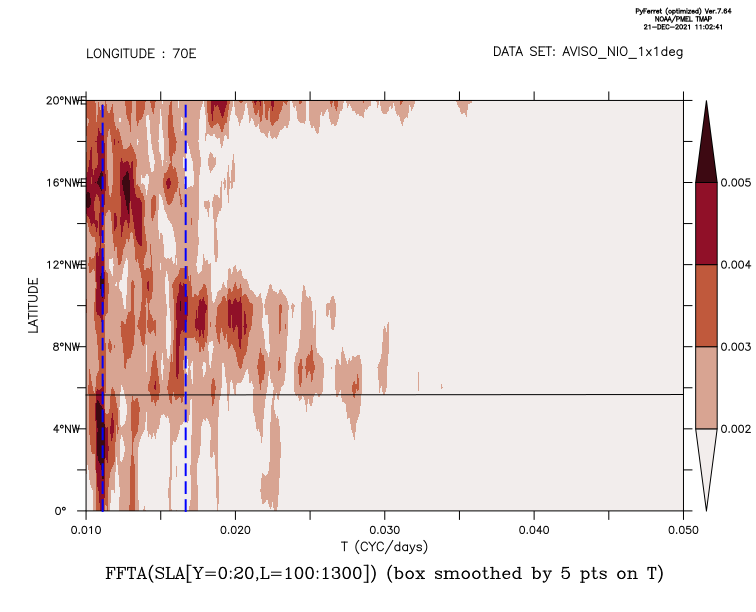

In [8]:
%%ferret
fill/x=70/lev=(-inf)(0.002,0.006,0.001)(inf)/hlimit=0.01:0.05/pal=cmocean_amp SLA_ffta[l=@sbx:5]; go land
plot/over/vs/thick=2/dash/color=blue/nolab {0.01111,0.01111},{0,20}
plot/over/vs/thick=2/dash/color=blue/nolab {0.01667,0.01667},{0,20}

<img src="Images/70deg_AVISO.png" width="600" height="400">

! Enter_GO land
! Exit_GO


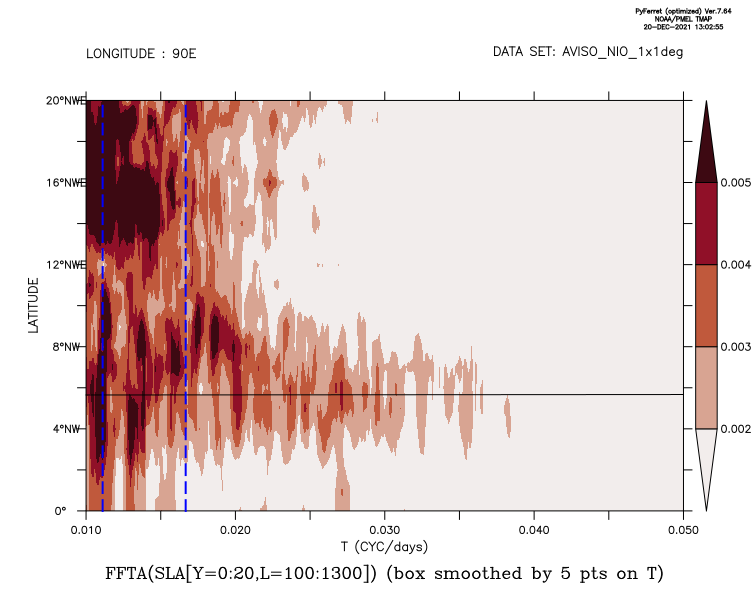

In [210]:
%%ferret
fill/x=90/lev=(-inf)(0.002,0.006,0.001)(inf)/hlimit=0.01:0.05/pal=cmocean_amp SLA_ffta[l=@sbx:5]; go land
plot/over/vs/thick=2/dash/color=blue/nolab {0.01111,0.01111},{0,20}
plot/over/vs/thick=2/dash/color=blue/nolab {0.01667,0.01667},{0,20}

<img src="Images/90deg_AVISO.png" width="600" height="400">

### Sea level observations in the equatorial Indian Ocean
show a primary spectral peak at 90 days and secondary peaks at 30–60 days over the intraseasonal band (20– 90-day period)

# 90 day sea level variability 

# Madden-Julian Oscillation - 30-60 days variability

<img src="Images/MJO_oliver.png" width="800" height="600">

The Madden-Julian Oscillation (MJO) is the dominant mode of atmospheric variability in the tropics in the intraseasonal band and is arguably the main prospect for predictability on these time scales [Madden and Julian, 1972; Zhang, 2005]. Most of the energy of the MJO is spread across a range of frequencies with periods between 30 and 90 days and zonal wavenumbers of 1 to 3 [Wheeler and Kiladis, 1999]. It is an eastward-propagating phenom- enon mainly detectable in outgoing longwave radiation, precipitation and zonal wind in the tropics (especially over the Indian and Western Pacific Oceans). The MJO prop- agates from its genesis point in the Indian Ocean across the Maritime continent and into the Pacific Ocean after which it weakens but continues to travel eastward before dissipating over the Atlantic Ocean and Africa. The Madden-Julian Oscillation is mainly an atmo- spheric phenomenon but it also has an oceanic expression. Sea surface temperatures have been observed to exhibit characteristics associated with the MJO [e.g., Woolnough et al., 2000; Shinoda et al., 1998]. There have also been observations of large-scale instraseasonal sea level variabil- ity in the extratropics (South Atlantic Ocean, South Indian Ocean, and North Pacific Ocean) which were well correlated with wind stress curl [Fu, 2003]. This sea level variability was found to be consistent with a basic barotropic vorticity model forced by the global wind field but connections to the MJO were never explored. Enfield [1987] used tide gauge data to study intraseasonal oscillations along the Pacific coast of the Americas and Spillane et al. [1987] speculated on remote forcing by equatorially trapped waves generated by the MJO. They attributed significant variability to coast- ally trapped waves that were not obviously forced by local meteorology and were coherent with eastward-propagating equatorially trapped waves with periods of about 50 days. This area has continued to be an active area of research [e.g., Clarke and Ahmed, 1999]. One goal of the present study is to expand on these previous works by including global altimeter observations of sea level. Most studies have focussed on the Pacific Ocean but a few notable works discuss forced intraseasonal variability in the Indian Ocean [e.g., Moore and McCreary, 1990; Han et al., 2001; Sengupta et al., 2001; Iskandar et al., 2005].

<video controls src="Images/MJO_anim.mp4" />

## MJO index 

Daily values of Wheeler and Hendon’s bivariate MJO index were obtained from the Government of Aus- tralia Bureau of Meteorology (http://www.bom.gov.au/ bmrc/clfor/cfstaff/matw/maproom/RMM/index.htm). The MJO index is based on the the first two principal components from an empirical orthogonal function analysis of tropical outgoing longwave radiation and zonal winds after removing season- al and interannual signals [Wheeler and Hendon, 2004]. The two indices describe a propagating phenomenon and so they are approximately in quadrature.

### Plot MJO index

In [23]:
%%ferret 
cancel data/all
use "Data/Index/rmm_74toRealtime_1990_2017.nc"
sh data
sh grid RMM1

currently SET data sets:
 1> Data/Index/rmm_74toRealtime_1990_2017.nc (default)
 name title I J K L
 RMM1 RMM1 ... ... ... 1:9920
 RMM2 RMM2 ... ... ... 1:9920
 PHASE PHASE ... ... ... 1:9920
 AMPLITUDE
 AMPLITUDE ... ... ... 1:9920
 
 GRID GQN1
 name axis # pts start end subset
 normal X
 normal Y
 normal Z
 TAX TIME 9920 r 01-JAN-1990 00:00 27-FEB-2017 00:00 full

! Enter_GO Codes/MJO_color_plot.jnl
! Exit_GO


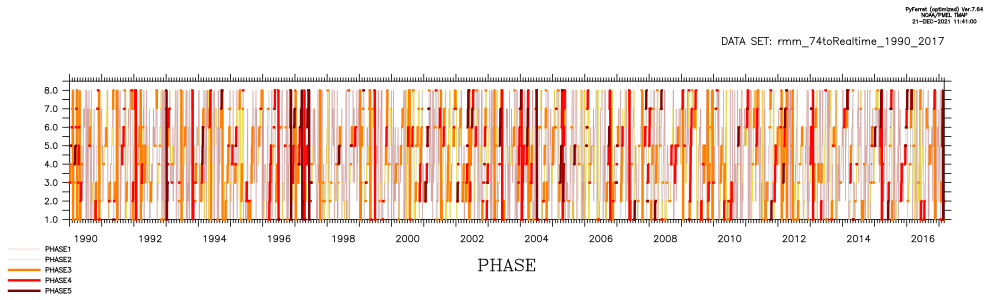

In [21]:
%%ferret -s 1000,500
!set region/t=01-Jan-2010:31-dec-2015
go "Codes/MJO_color_plot.jnl"

## To identify the relationships Between Sea Level and the MJO
### Filtering Sea level data in the MJO period ( 30-80 days )



In [26]:
%%ferret
cancel data/all
use/order=XYT "Data/AVISO_NIO_1x1deg.nc"
list/l=1:10/x=90/y=0 ssh

VARIABLE : SLA[G=GRD]
 FILENAME : AVISO_NIO_1x1deg.nc
 FILEPATH : Data/
 SUBSET : 10 points (TIME)
 LONGITUDE: 90E
 LATITUDE : 0
 90E 
 51
 04-JAN-1993 00 / 1: -0.0485
 11-JAN-1993 00 / 2: -0.0838
 18-JAN-1993 00 / 3: -0.0768
 25-JAN-1993 00 / 4: -0.0751
 01-FEB-1993 00 / 5: -0.1167
 08-FEB-1993 00 / 6: -0.1185
 15-FEB-1993 00 / 7: -0.0918
 22-FEB-1993 00 / 8: -0.0964
 01-MAR-1993 00 / 9: -0.1265
 08-MAR-1993 00 / 10: -0.0837

LANCZOS(A,F1,F2,N)
 Bandpass filters data in time using a Lanczos filter
 A: Data to be filtered in time (may also vary in x,y,z,e,f)
 F1: Low frequency cutoff
 F2: High frequency cutoff
 N: Number of weights (must be odd)


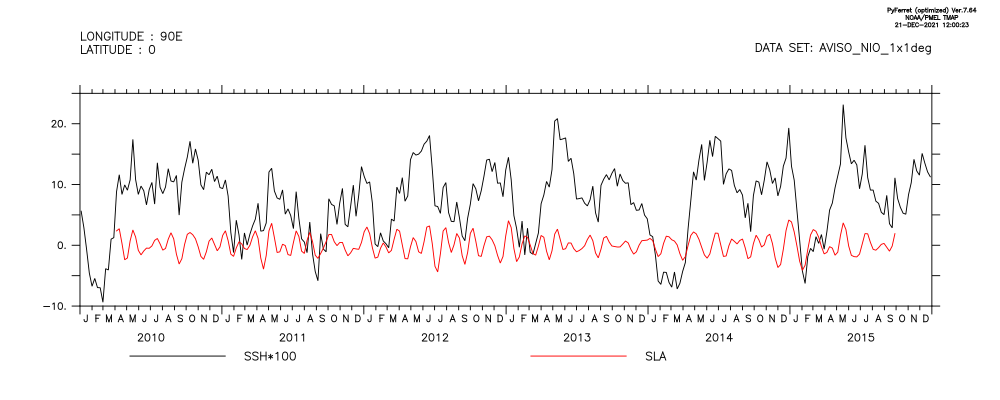

In [38]:
%%ferret -s 1000,400
sh fu lanczos
let SLA = lanczos(ssh[l=@fln:3],7/80,7/30,27)*100 ! Lanczos butterworth filter 

pl/x=90/y=0/t=01-jan-2010:30-dec-2015 ssh*100,sla

! Enter_GO fland 5
! Exit_GO
! Enter_GO land 7
! Exit_GO


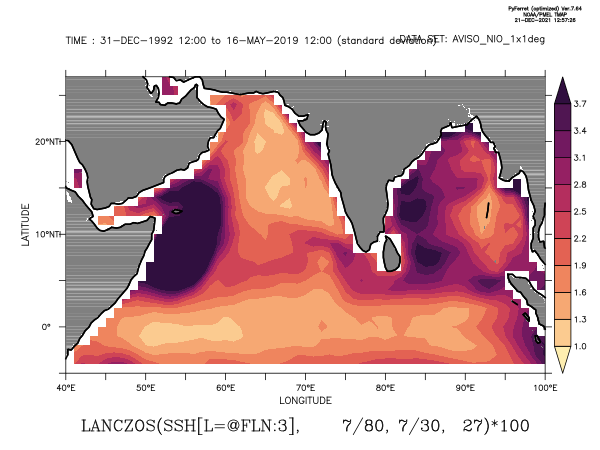

In [97]:
%%ferret -s 600,450
fill/lev=(-inf)(1,3.5,0.3)(inf)/pal=cmocean_matter sla[l=@std,d=1]
let sla_std = sla[l=@std,d=1]
go fland 5 ; go land 7

<img src="Images/MJO_std.png" width="800" height="600">

In [91]:
%%ferret
use "Data/Index/rmm_74toRealtime_1990_2017.nc"
sh d

let Rmm1_30_80 = lanczos(Rmm1[d=2,l=@fln:3],1/80, 1/30, 191)
let Rmm2_30_80 = lanczos(Rmm2[d=2,l=@fln:3],1/80, 1/30, 191)
let SLA        = lanczos(ssh[l=@fln:3],     7/80, 7/30,  27)*100

currently SET data sets:
 1> Data/AVISO_NIO_1x1deg.nc
 name title I J K L
 SSH SLA[G=GRD] 1:61 1:33 ... 1:1376
 
 2> Data/Index/rmm_74toRealtime_1990_2017.nc (default)
 name title I J K L
 RMM1 RMM1 ... ... ... 1:9920
 RMM2 RMM2 ... ... ... 1:9920
 PHASE PHASE ... ... ... 1:9920
 AMPLITUDE
 AMPLITUDE ... ... ... 1:9920

! Enter_GO variance
... Variance and Covariance: Instructions:
Use the LET/QUIET command to define the variable(s) P (and Q) as
your variable(s) of interest (e.g. yes? LET/QUIET P = u[x=180,y=0])
The variance of P will be variable P_VAR (Q --> Q_VAR)
The covariance will be COVAR The correlation will be CORREL.
Type GO VAR_N to obtain n/n+1 statistical correction factor
...
! Exit_GO
! Enter_GO fland 5
! Exit_GO
! Enter_GO land 7
! Exit_GO


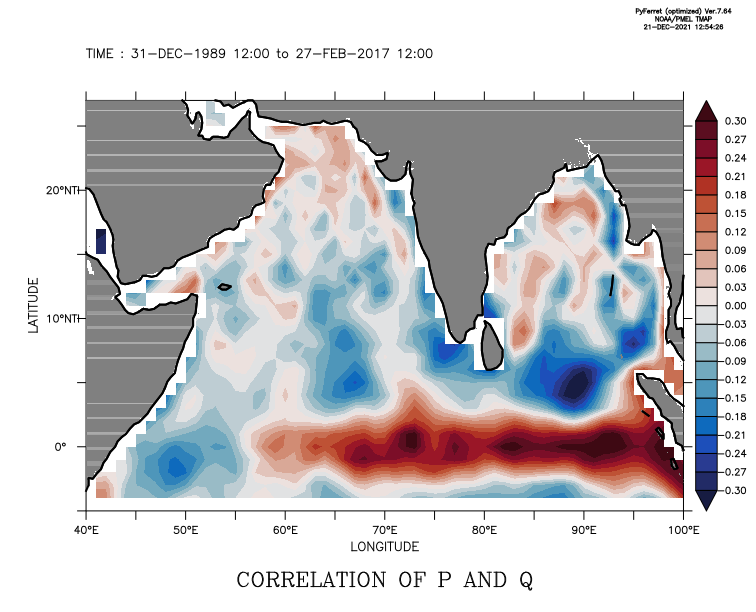

In [96]:
%%ferret
let p = rmm1_30_80
let q = sla[d=1,gt=rmm1_30_80]
go variance
fill/pal=cmocean_amp/lev=(-inf)(-0.3,0.3,0.03)(inf)/pal=cmocean_balance correl ; go fland 5 ; go land 7

! Enter_GO fland 5
! Exit_GO
! Enter_GO land 7
! Exit_GO


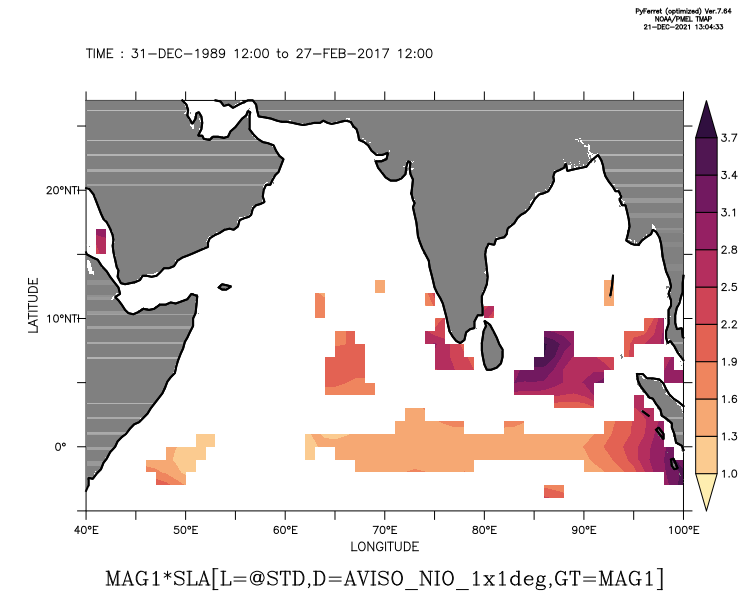

In [119]:
%%ferret
let mag1 = if (correl^2)^0.5 ge 0.1 then 1
fill/lev=(-inf)(1,3.5,0.3)(inf)/pal=cmocean_matter mag1*sla[l=@std,d=1,gt=mag1] ; go fland 5 ; go land 7

! Enter_GO variance
... Variance and Covariance: Instructions:
Use the LET/QUIET command to define the variable(s) P (and Q) as
your variable(s) of interest (e.g. yes? LET/QUIET P = u[x=180,y=0])
The variance of P will be variable P_VAR (Q --> Q_VAR)
The covariance will be COVAR The correlation will be CORREL.
Type GO VAR_N to obtain n/n+1 statistical correction factor
...
! Exit_GO
! Enter_GO fland 5
! Exit_GO
! Enter_GO land 7
! Exit_GO


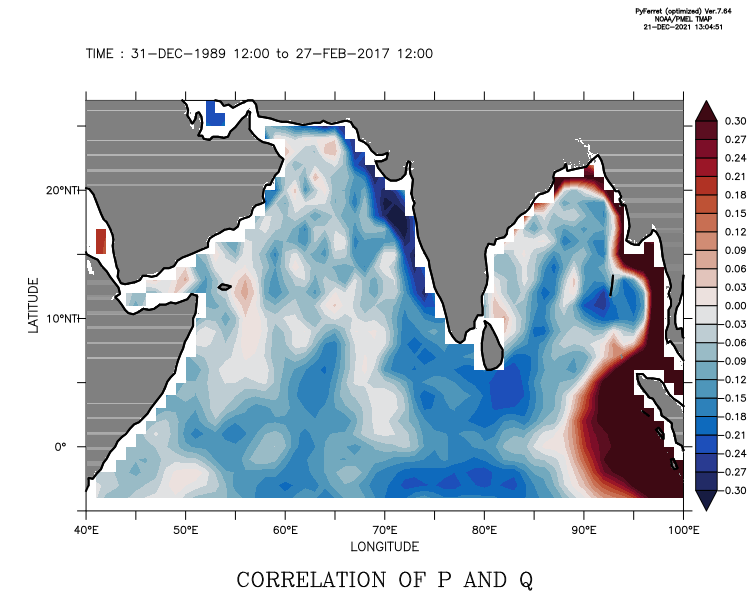

In [120]:
%%ferret
let p = rmm2_30_80
let q = sla[d=1,gt=rmm2_30_80]
go variance
fill/pal=cmocean_amp/lev=(-inf)(-0.3,0.3,0.03)(inf)/pal=cmocean_balance correl ; go fland 5 ; go land 7

! Enter_GO fland 5
! Exit_GO
! Enter_GO land 7
! Exit_GO


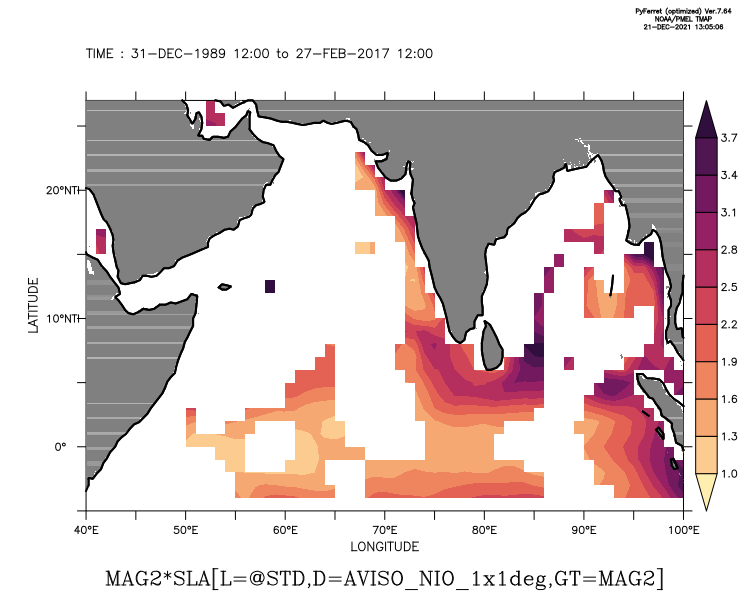

In [121]:
%%ferret
let mag2 = if (correl^2)^0.5 ge 0.1 then 1
fill/lev=(-inf)(1,3.5,0.3)(inf)/pal=cmocean_matter mag2*sla[l=@std,d=1,gt=mag2] ; go fland 5 ; go land 7

! Enter_GO fland 5
! Exit_GO
! Enter_GO land 7
! Exit_GO


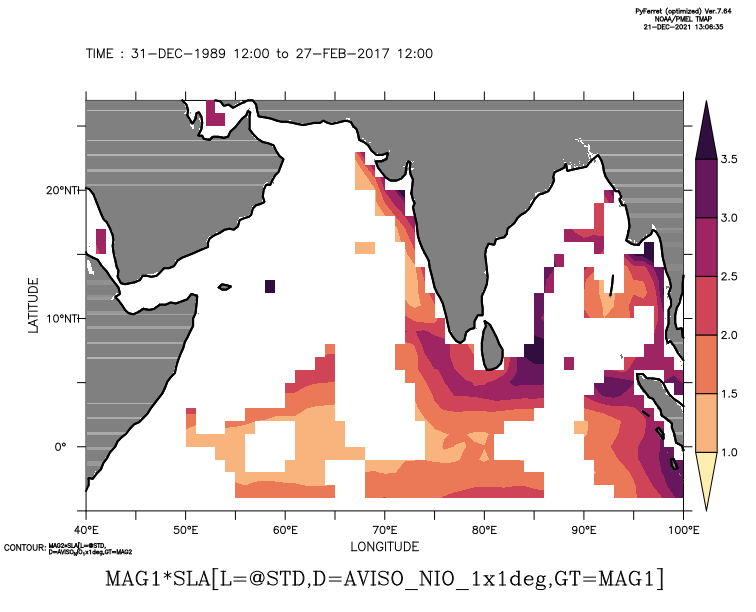

In [123]:
%%ferret
fill/lev=(-inf)(1,3.5,0.5)(inf)/pal=cmocean_matter mag1*sla[l=@std,d=1,gt=mag1] 
fill/lev=(-inf)(1,3.5,0.5)(inf)/pal=cmocean_matter/over mag2*sla[l=@std,d=1,gt=mag2] ; go fland 5 ; go land 7

<img src="Images/MJO_std_zoom.png" width="700" height="500">

## Wave propagations in Indian Ocean associated with MJO


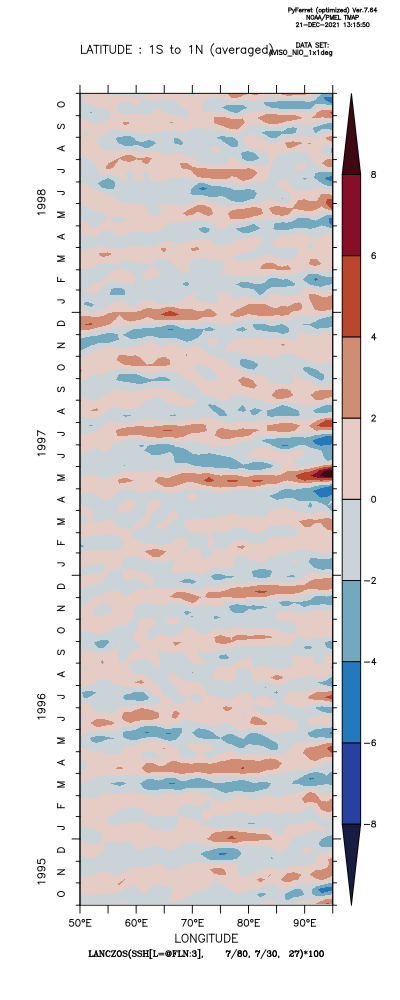

In [134]:
%%ferret -s 400,1000
fill/x=50:95/y=-1:1/t=01-oct-1995:30-oct-1998/lev=(-inf)(-8,8,2)(inf)/pal=cmocean_balance sla[y=@ave,d=1]


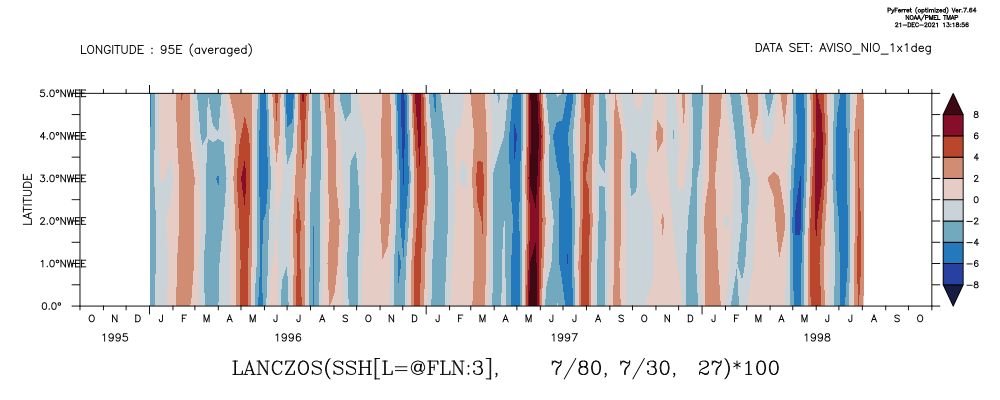

In [144]:
%%ferret -s 1000,400
fill/x=95/y=0:5/t=01-oct-1995:30-oct-1998/lev=(-inf)(-8,8,2)(inf)/pal=cmocean_balance sla[x=@ave,d=1]


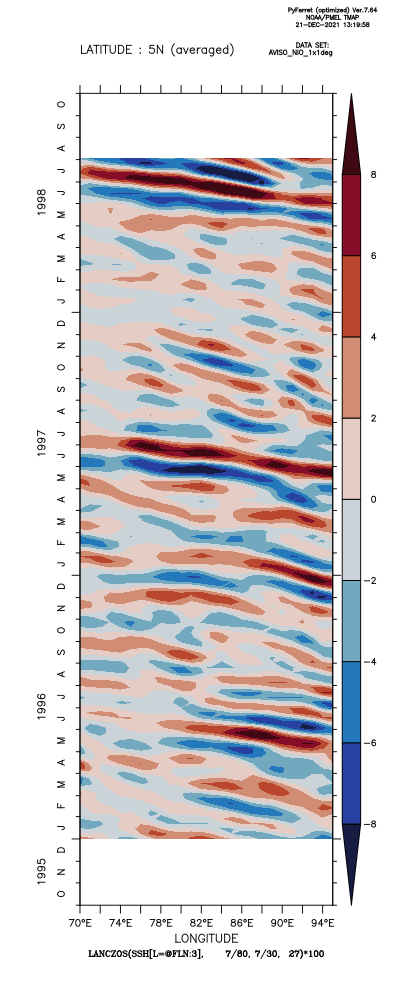

In [146]:
%%ferret -s 400,1000
fill/x=70:95/y=5/t=01-oct-1995:30-oct-1998/lev=(-inf)(-8,8,2)(inf)/pal=cmocean_balance sla[Y=@ave,d=1]

<img src="Images/MJO_waves_IO.png" width="700" height="500">
<img src="Images/MJO_waves_IO1.png" width="700" height="500">


Re-defining viewport THIRD1
Re-defining viewport THIRD2


! Enter_GO margins 0.4 0.6 1 1
! Exit_GO
! Enter_GO margins 0.4 0.6 1 1
! Exit_GO


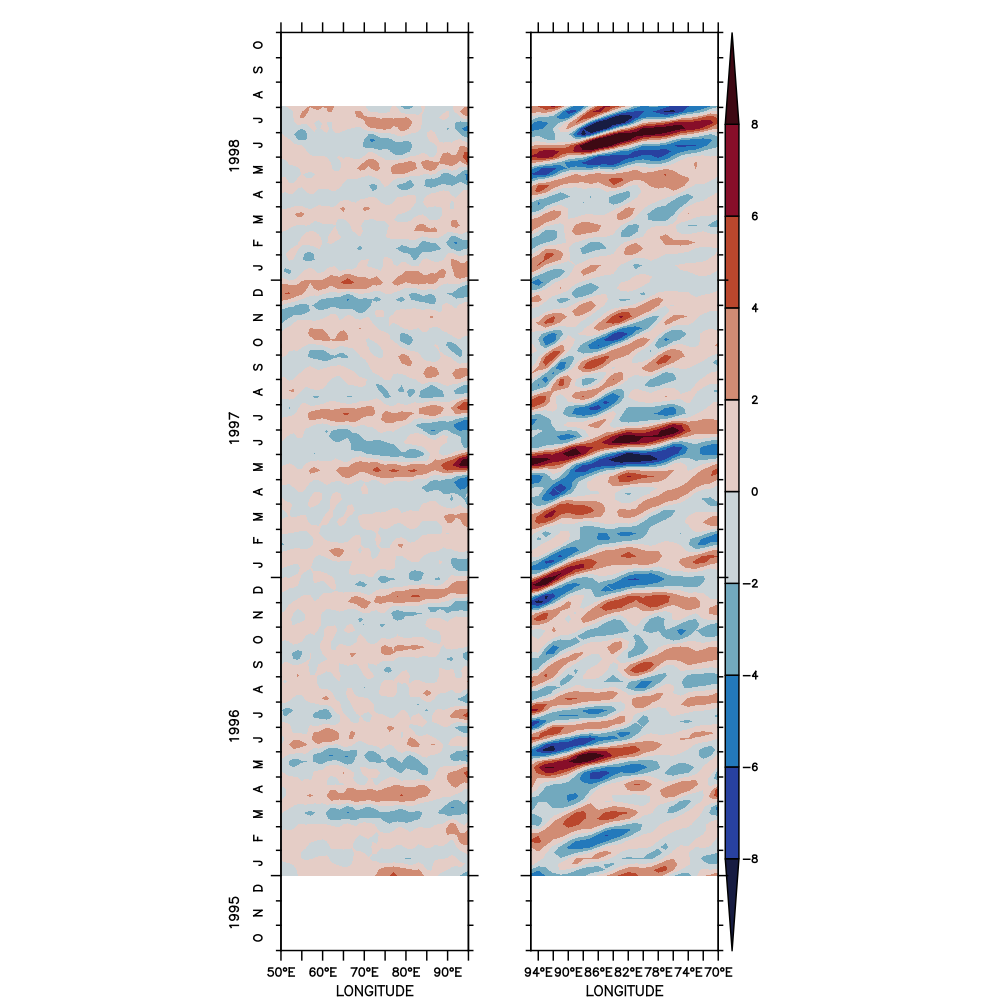

In [178]:
%%ferret -s 1000,1000
def viewport/x=0.2:0.55/y=0:1 third1; set viewport third1
pal cmocean_balance
PPL TXLABP,-1
go margins 0.4 0.6 1 1          ! reduce the margins

fill/x=50:95/y=-1:1/t=01-oct-1995:30-oct-1998/lev=(-inf)(-8,8,2)(inf)/pal=cmocean_balance/nokey sla[y=@ave,d=1]
def viewport/x=0.45:0.8/y=0:1 third2; set viewport third2
go margins 0.4 0.6 1 1
fill/x=70:95/y=5/t=01-oct-1995:30-oct-1998/lev=(-inf)(-8,8,2)(inf)/pal=cmocean_balance/hlimit=95:70 sla[Y=@ave,d=1]
PPL TXLABP,0
Ppl FILL